## IST664 - Homework 2

Originality assertion: All of the text and comments in this file are my original work (except for template items written by the instructor). All of the code in this file is my work, except where I give credit to another source. By adding my name below, I affirm this originality assertion.

## My name: Ben Tisinger_________ #

**Task 1: Use Beautiful Soup**

In [48]:
# Import Beautiful Soup for its web scraping capabilities
import bs4 as bs
import urllib.request # For retrieving from web pages
import re # Regular expressions
import spacy

In [49]:
# Change this URL to a Wikipedia article of your choice
wiki_url_1 = 'https://en.wikipedia.org/wiki/Android_Oreo'

scraped_data = urllib.request.urlopen(wiki_url_1)

type(scraped_data) # A response object for a web page


http.client.HTTPResponse

In [50]:
# Now extract the text from the article and organize into paragraphs
article = scraped_data.read() # Extract the data from the response object

parsed_article = bs.BeautifulSoup(article,'lxml') # Use lxml as the back end parser

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

len(article_text)

8319

**Task 2: Use RegEx to remove Wikipedia References and Extra Space**

In [51]:
# Put your code for task 2 here

remove_wiki_ref = re.sub(r'\[\d+\]', '', article_text)
article_text = re.sub(r'\s+', ' ', remove_wiki_ref)
len(article_text)


8098

**Task 3: Tokenize with spaCy**

In [52]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

my_article = nlp(article_text)

len(my_article) # Length in tokens

1507

In [53]:
# Here's one way to work with individual sentences:
my_spans = list(my_article.sents)

my_spans[1] # Let's view just the first sentence

It was initially unveiled as an alpha quality developer preview in March 2017 and later made available to the public, on August 21, 2017.

In [98]:
my_spans = list(my_article.sents)

Located outside the park's railroad tracks and named after a Georgia mining town in the late 19th century, Lickskillet added three new rides — the Spindle Top (a Rotor flat ride, the Wheel Burrow (a Chance Tumbler) and the Sky Buckets, the park's second cable car ride — along with several craft shops and a shootout show performed on the street.

**Task 4: Use displaCy to show named entities for an early sentence**

In [54]:
# Put your code for task 4 here

displacy.render(my_spans[1], style="ent", jupyter=True)


For the following tasks, create a pandas dataframe and store each disovered token in an appropriately-named column.

**Task 5: Find the Root Verbs for each span**

Make a sentence by sentence list of all of the root verbs.

In [55]:
my_spans[1].root # The span object has an attribute that points to the root token

unveiled

In [56]:
len(my_spans)

50

In [57]:
import pandas as pd

data_pd  = []

for i, sent in enumerate(my_spans):
    root = sent.root
    data_pd.append({
        "sentence_number": i + 1,
        "root_text": root.text,

    })

wiki_1 = pd.DataFrame(data_pd)
wiki_1

#Used Source - https://www.phind.com/

,sentence_number,root_text
0,1,is
1,2,unveiled
2,3,contains
3,4,introduces
4,5,ran
5,6,codenamed
6,7,released
7,8,released
8,9,released
9,10,finalized


**Task 6: Find the Subjects of Each Span**

Put a column in your pandas dataframe and fill it with the subjects from each span.

In [58]:
# Here's one simple way to find the subject of a sentence
for tok in my_spans[1]:
  if tok.dep_ == "nsubj":
    print(tok)

In [59]:
subjects = []


for sent in my_spans:
    subj = "NA"
    for tok in sent:
        if tok.dep_ == "nsubj":
            subj = tok.text
            break
    subjects.append(subj)

wiki_1["subjects"] = subjects
wiki_1

,sentence_number,root_text,subjects
0,1,is,Oreo
1,2,unveiled,NA
2,3,contains,It
3,4,introduces,Oreo
4,5,ran,Oreo
5,6,codenamed,NA
6,7,released,Google
7,8,released,NA
8,9,released,NA
9,10,finalized,DP3


**Task 7: Find the Direct Objects of Each Span**

Put a column in your pandas dataframe and fill it with the direct objects from each span.

In [60]:
for tok in my_spans[1]:
  if tok.dep_ == "dobj":
    print(tok)

In [61]:
direct_objects = []

for sent in my_spans:
    direct_obj = "NA"
    for tok in sent:
        if tok.dep_ == "dobj":
            direct_obj = tok.text
            break
    direct_objects.append(direct_obj)

wiki_1["direct_objects"] = direct_objects
wiki_1

,sentence_number,root_text,subjects,direct_objects
0,1,is,Oreo,O
1,2,unveiled,NA,NA
2,3,contains,It,number
3,4,introduces,Oreo,features
4,5,ran,Oreo,updates
5,6,codenamed,NA,NA
6,7,released,Google,preview
7,8,released,NA,NA
8,9,released,NA,version
9,10,finalized,DP3,API


**Task 8: Find the first Named Entity (if any) from Each Span**

Put two columns in your pandas dataframe. Find the first named entity in a span (if any) and record the ent_type_ and the corresponding token in those two columns.

In [62]:
for tok in my_spans[1]:
  if len(tok.ent_type_) > 0:
    print(tok.ent_type_, tok)

DATE March
DATE 2017
DATE August
DATE 21
DATE ,
DATE 2017


In [63]:
first_named_entity = []
first_named_entity_type = []

for sent in my_spans:
    first_ent = "NA"
    first_ent_type = "NA"
    for tok in sent:
        if tok.ent_type_:
            first_ent = tok.text
            first_ent_type = tok.ent_type_
            break

    first_named_entity.append(first_ent)
    first_named_entity_type.append(first_ent_type)


wiki_1["first_named_entity"] = first_named_entity
wiki_1["first_named_entity_type"] = first_named_entity_type
wiki_1

#Used Source - https://www.phind.com/

,sentence_number,root_text,subjects,direct_objects,first_named_entity,first_named_entity_type
0,1,is,Oreo,O,Android,ORG
1,2,unveiled,NA,NA,March,DATE
2,3,contains,It,number,5,CARDINAL
3,4,introduces,Oreo,features,Android,ORG
4,5,ran,Oreo,updates,January,DATE
5,6,codenamed,NA,NA,Android,ORG
6,7,released,Google,preview,March,DATE
7,8,released,NA,NA,second,ORDINAL
8,9,released,NA,version,third,ORDINAL
9,10,finalized,DP3,API,API,ORG


**Task 9: Show the shape of your data frame**

In [64]:
# Add code to show the shape of your data frame
wiki_1.shape

(50, 6)

**Task 10: Show the unique set of elements from each column in the data frame**

In [65]:
# Use set() on the data in each column to show the list of unique elements
for col in wiki_1.columns:
    unique_elements = set(wiki_1[col])
    print(f"Unique elements in column '{col}':")
    print(unique_elements)
    print()

Unique elements in column 'sentence_number':
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}

Unique elements in column 'root_text':
{'sideloaded', 'menu', 'allows', 'adds', 'is', 'were', 'codenamed', 'introduces', 'orders', 'revised', 'supports', 'contains', 'designed', 'introduced', 'perform', 'implemented', 'modified', 'made', 'modularized', 'intended', 'ran', 'unveiled', 'reboot', 'has', 'specify', 'set', 'highlight', 'released', 'finalized', 'snoozed', 'limited', 'includes', 'support', 'reduces', 'features'}

Unique elements in column 'subjects':
{'Google', 'Compact', 'Apps', 'This', 'which', 'device', 're', 'It', 'app', 'Store', 'update', 'mode', 'NA', 'it', 'boot', 'functionality', 'DP3', 'Oreo', 'architecture', 'devices', 'Runtime', 'interface'}

Unique elements in column 'direct_objects':
{'footprint', 'emoji', 'installation', 'feature

**Task 11: Show your data frame**

In [66]:
# Type the name of your data frame on a line by itself to display it

In [67]:
wiki_1

,sentence_number,root_text,subjects,direct_objects,first_named_entity,first_named_entity_type
0,1,is,Oreo,O,Android,ORG
1,2,unveiled,NA,NA,March,DATE
2,3,contains,It,number,5,CARDINAL
3,4,introduces,Oreo,features,Android,ORG
4,5,ran,Oreo,updates,January,DATE
5,6,codenamed,NA,NA,Android,ORG
6,7,released,Google,preview,March,DATE
7,8,released,NA,NA,second,ORDINAL
8,9,released,NA,version,third,ORDINAL
9,10,finalized,DP3,API,API,ORG


Don't forget to also process your second article in the same fashion as you did for the first one.

In [68]:
# Code for processing the second article starts here

In [69]:
###########################################################################################################################

In [70]:
# Change this URL to a Wikipedia article of your choice
wiki_url_2 = 'https://en.wikipedia.org/wiki/Six_Flags_Over_Georgia'

scraped_data = urllib.request.urlopen(wiki_url_2)

type(scraped_data) # A response object for a web page


http.client.HTTPResponse

In [71]:
# Now extract the text from the article and organize into paragraphs
article = scraped_data.read() # Extract the data from the response object

parsed_article = bs.BeautifulSoup(article,'lxml') # Use lxml as the back end parser

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

len(article_text)

11011

In [72]:
# Put your code for task 2 here

remove_wiki_ref = re.sub(r'\[\d+\]', '', article_text)
article_text = re.sub(r'\s+', ' ', remove_wiki_ref)
len(article_text)


10896

In [73]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

my_article = nlp(article_text)

len(my_article) # Length in tokens

2100

In [74]:
# Here's one way to work with individual sentences:
my_spans = list(my_article.sents)

my_spans[1] # Let's view just the first sentence

Opened in 1967, it is the second park in the Six Flags chain following the original Six Flags Over Texas, which opened in 1961.

In [75]:
# Put your code for task 4 here

displacy.render(my_spans[1], style="ent", jupyter=True)

In [76]:
my_spans[1].root # The span object has an attribute that points to the root token

is

In [77]:
len(my_spans)

72

In [78]:
import pandas as pd

data_pd  = []

for i, sent in enumerate(my_spans):
    root = sent.root
    data_pd.append({
        "sentence_number": i + 1,
        "root_text": root.text,

    })

wiki_2 = pd.DataFrame(data_pd)
wiki_2

#Used Source - https://www.phind.com/

,sentence_number,root_text
0,1,is
1,2,is
2,3,is
3,4,features
4,5,began
...,...,...
67,68,occurred
68,69,managed
69,70,said
70,71,began


In [79]:
# Here's one simple way to find the subject of a sentence
for tok in my_spans[1]:
  if tok.dep_ == "nsubj":
    print(tok)

it
which


In [80]:
subjects = []


for sent in my_spans:
    subj = "NA"
    for tok in sent:
        if tok.dep_ == "nsubj":
            subj = tok.text
            break
    subjects.append(subj)

wiki_2["subjects"] = subjects
wiki_2

,sentence_number,root_text,subjects
0,1,is,Flags
1,2,is,it
2,3,is,Flags
3,4,features,it
4,5,began,Wynne
...,...,...,...
67,68,occurred,bulk
68,69,managed,park
69,70,said,police
70,71,began,people


In [81]:
for tok in my_spans[1]:
  if tok.dep_ == "dobj":
    print(tok)

In [82]:
direct_objects = []

for sent in my_spans:
    direct_obj = "NA"
    for tok in sent:
        if tok.dep_ == "dobj":
            direct_obj = tok.text
            break
    direct_objects.append(direct_obj)

wiki_2["direct_objects"] = direct_objects
wiki_2

,sentence_number,root_text,subjects,direct_objects
0,1,is,Flags,NA
1,2,is,it,NA
2,3,is,Flags,NA
3,4,features,it,themes
4,5,began,Wynne,NA
...,...,...,...,...
67,68,occurred,bulk,NA
68,69,managed,park,damage
69,70,said,police,day
70,71,began,people,CCPD


In [83]:
for tok in my_spans[1]:
  if len(tok.ent_type_) > 0:
    print(tok.ent_type_, tok)

DATE 1967
ORDINAL second
CARDINAL Six
CARDINAL Six
GPE Texas
DATE 1961


In [84]:
first_named_entity = []
first_named_entity_type = []

for sent in my_spans:
    first_ent = "NA"
    first_ent_type = "NA"
    for tok in sent:
        if tok.ent_type_:
            first_ent = tok.text
            first_ent_type = tok.ent_type_
            break

    first_named_entity.append(first_ent)
    first_named_entity_type.append(first_ent_type)


wiki_2["first_named_entity"] = first_named_entity
wiki_2["first_named_entity_type"] = first_named_entity_type
wiki_2

#Used Source - https://www.phind.com/

,sentence_number,root_text,subjects,direct_objects,first_named_entity,first_named_entity_type
0,1,is,Flags,NA,Six,CARDINAL
1,2,is,it,NA,1967,DATE
2,3,is,Flags,NA,Six,CARDINAL
3,4,features,it,themes,Six,CARDINAL
4,5,began,Wynne,NA,Six,CARDINAL
...,...,...,...,...,...,...
67,68,occurred,bulk,NA,the,DATE
68,69,managed,park,damage,NA,NA
69,70,said,police,day,opening,DATE
70,71,began,people,CCPD,the,ORG


In [85]:
# Add code to show the shape of your data frame
wiki_2.shape

(72, 6)

In [86]:
# Use set() on the data in each column to show the list of unique elements
for col in wiki_2.columns:
    unique_elements = set(wiki_2[col])
    print(f"Unique elements in column '{col}':")
    print(unique_elements)
    print()

Unique elements in column 'sentence_number':
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}

Unique elements in column 'root_text':
{'based', 'prides', 'terminated', 'owned', 'began', 'caused', 'is', 'left', 'proposed', 'were', 'rank', 'was', 'fired', 'upgraded', 'approved', 'sits', 'announced', 'suffered', 'included', 'replace', 'occurred', 'destroyed', 'been', 'Batman', 'became', 'opened', 'received', 'are', 'sued', 'set', 'removed', 'managed', 'reported', 'said', 'built', 'replaced', 'inspired', 'renamed', 'expanded', 'sold', 'maintains', 'agreed', 'lie', 'added', 'features'}

Unique elements in column 'subjects':
{'characters', 'collection', 'They', 'McKoy', 'partners', 'officer', 'Ride', 'that', 'Characters', 'offerings', 'which', 'Portions', 'It', 'pe

In [87]:
wiki_2

,sentence_number,root_text,subjects,direct_objects,first_named_entity,first_named_entity_type
0,1,is,Flags,NA,Six,CARDINAL
1,2,is,it,NA,1967,DATE
2,3,is,Flags,NA,Six,CARDINAL
3,4,features,it,themes,Six,CARDINAL
4,5,began,Wynne,NA,Six,CARDINAL
...,...,...,...,...,...,...
67,68,occurred,bulk,NA,the,DATE
68,69,managed,park,damage,NA,NA
69,70,said,police,day,opening,DATE
70,71,began,people,CCPD,the,ORG


In [88]:
'''
When looking at the two articles that I picked out, they are vastly different in nature. The first article is about the Android version called Oreo and the second is about Six Flags in Georgia.
When putting the outputs side by side and comparing our pandas dataframe, there are not many root words in common other than 'IS'. However there are some subjects that are in common such as 'IT' and if we are counting 'NA's then 'NA'.
I don't believe that you can get a clear picture of what the article is about just by looking at the dataframe. We can see key words such as Oreo, Park, Software, Manage, Wynne but that doesn't give us a clear picture just a basic understanding of what it
might be about. Oreo could highlight the snack food and not the software version which could be quite confusing. When thinking about the next steps or what we could do, a few topics come to mind. We could use the dataframe to create advanced
clustering techniques by associating roots with verbs or adjectives to identify common themes or patterns. We can also use the dataframes for visualization such as heatmaps and bar charts for commons verbs or subjects. I would personally proceed with some
adavanced ML functions and for visualization.

'''

"\nWhen looking at the two articles that I picked out, they are vastly different in nature. The first article is about the Android version called Oreo and the second is about Six Flags in Georgia. \nWhen putting the outputs side by side and comparing our pandas dataframe, there are not many root words in common other than 'IS'. However there are some subjects that are in common such as 'IT' and if we are counting 'NA's then 'NA'.   \nI don't believe that you can get a clear picture of what the article is about just by looking at the dataframe. We can see key words such as Oreo, Park, Software, Manage, Wynne but that doesn't give us a clear picture just a basic understanding of what it\nmight be about. Oreo could highlight the snack food and not the software version which could be quite confusing. When thinking about the next steps or what we could do, a few topics come to mind. We could use the dataframe to create advanced\nclustering techniques by associating roots with verbs or adjec

Don't forget to put in a concluding paragraph with your observations comparing the two articles.

In [90]:
wiki_1

,sentence_number,root_text,subjects,direct_objects,first_named_entity,first_named_entity_type
0,1,is,Oreo,O,Android,ORG
1,2,unveiled,NA,NA,March,DATE
2,3,contains,It,number,5,CARDINAL
3,4,introduces,Oreo,features,Android,ORG
4,5,ran,Oreo,updates,January,DATE
5,6,codenamed,NA,NA,Android,ORG
6,7,released,Google,preview,March,DATE
7,8,released,NA,NA,second,ORDINAL
8,9,released,NA,version,third,ORDINAL
9,10,finalized,DP3,API,API,ORG


In [92]:
print(wiki_1.columns.tolist())


['sentence_number', 'root_text', 'subjects', 'direct_objects', 'first_named_entity', 'first_named_entity_type']


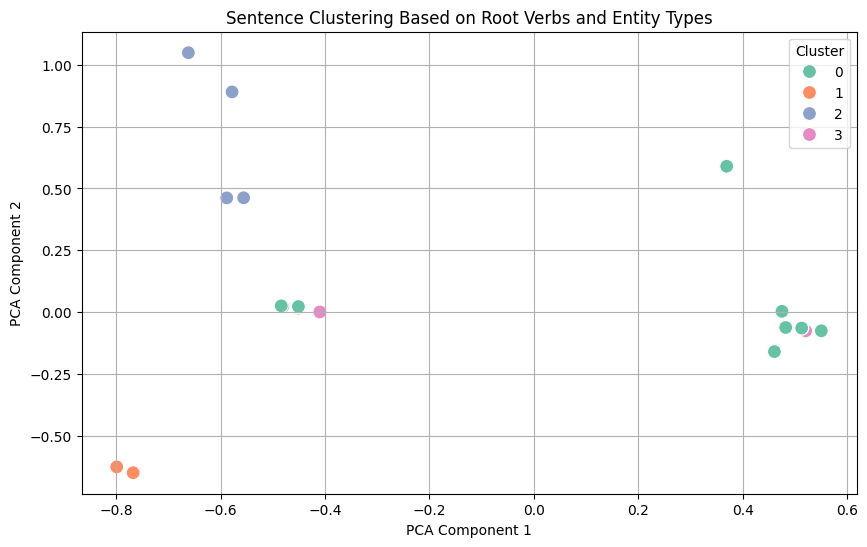

In [94]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = wiki_1[["root_text", "first_named_entity_type"]].fillna("NA")

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_features)

wiki_1["cluster"] = clusters

pca = PCA(n_components=2)
reduced = pca.fit_transform(encoded_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=wiki_1["cluster"], palette="Set2", s=100)
plt.title("Sentence Clustering Based on Root Verbs and Entity Types")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

##Used Source - https://www.phind.com/

<ipython-input-95-131cb64df582>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verb_counts.index, y=verb_counts.values, palette='viridis')


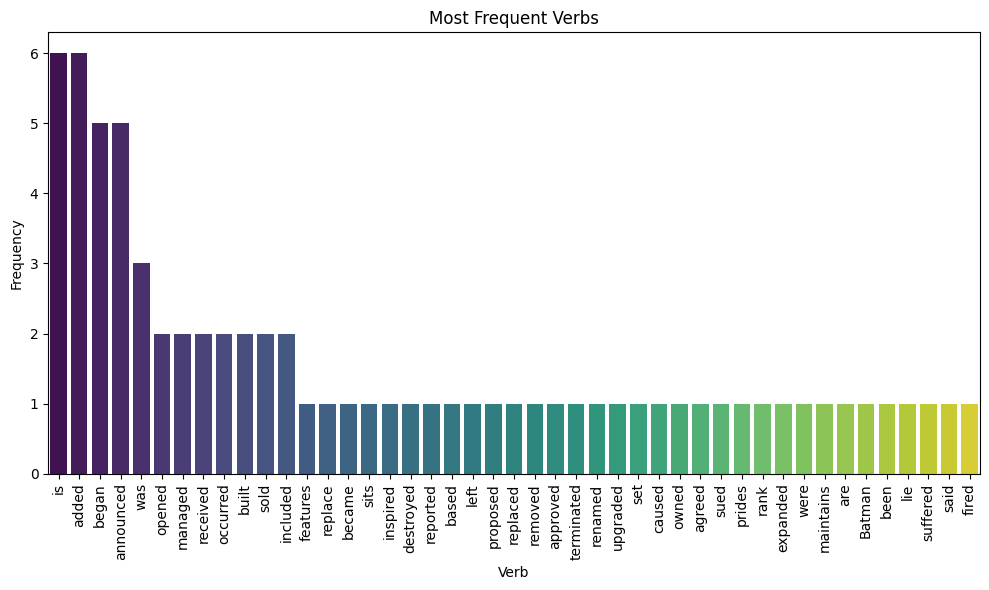

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns


verb_counts = wiki_2['root_text'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=verb_counts.index, y=verb_counts.values, palette='viridis')


plt.title('Most Frequent Verbs')
plt.xlabel('Verb')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
##Used Source - https://www.phind.com/